## Airline Customer satisfaction 


















In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataframe from file
air = pd.read_csv("/content/Invistico_Airline.csv")
air.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# check the shape of the data
print(air.shape)

(129880, 23)


In [ ]:
# check the data types
print(air.dtypes)

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
# check for missing values
print(air.isnull().sum())

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [ ]:
# get the count and percentage of missing values
missing = air['Arrival Delay in Minutes'].isnull().sum()
missing_percent =air['Arrival Delay in Minutes'].isnull().sum() / air.shape[0]

In [ ]:
# print the count and percentage of missing values
print("Missing: ", missing, " (", missing_percent, ")")

Missing:  393  ( 0.003025870033877425 )


In [ ]:
# Handling missing values
air[air.isnull().any(axis=1)]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,...,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,...,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,...,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,satisfied,Male,Loyal Customer,44,Business travel,Business,3431,2,2,3,...,4,5,5,5,5,5,5,4,70,NaN
128131,satisfied,Male,Loyal Customer,39,Business travel,Business,1595,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,satisfied,Female,Loyal Customer,45,Business travel,Eco,871,5,1,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,1594,5,4,5,...,3,3,1,4,3,3,4,3,0,NaN


In [ ]:
# Impute replacement values (with the mean) using fillna function
air['Arrival Delay in Minutes'] = air['Arrival Delay in Minutes'].fillna(air['Arrival Delay in Minutes'].mean())
air['Arrival Delay in Minutes']

0           0.0
1         305.0
2           0.0
3           0.0
4           0.0
          ...  
129875      0.0
129876    172.0
129877    163.0
129878    205.0
129879    186.0
Name: Arrival Delay in Minutes, Length: 129880, dtype: float64

In [ ]:
# check the shape of the data after dropping missing values
print(air.shape)

(129880, 23)


In [ ]:
# summary statistics of the data
air.describe()


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.407410
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# Group age column
def age_buckets(x): 
  if x < 20: return '0-19'
  elif x < 30: return '18-29' 
  elif x < 40: return '30-39' 
  elif x < 50: return '40-49'
  elif x < 60: return '50-59' 
  elif x < 70: return '60-69' 
  elif x > 70: return '70-79' 
  else: return '80+'

In [ ]:
air['Age_range'] = air.Age.apply(age_buckets)
air.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Age_range
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,3,0,3,5,3,2,0,0.0,60-69
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,3,4,4,4,2,3,2,310,305.0,40-49


## Explore data

In [ ]:
# Get the rows with index values range from 0 to 5
air.loc[0:5]
#air.iloc[0:5]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Age_range
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,3,0,3,5,3,2,0,0.0,60-69
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,3,4,4,4,2,3,2,310,305.0,40-49
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,3,3,4,4,4,2,0,0.0,0-19
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,1,0,1,4,1,3,0,0.0,60-69
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,2,0,2,4,2,5,0,0.0,80+
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,5,4,5,5,4,2,0,0.0,30-39


In [ ]:
air.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Age_range'],
      dtype='object')

In [ ]:
# get the value counts for the 'satisfaction' column
air['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [ ]:
# get the percentage of each satisfaction category
air['satisfaction'].value_counts(normalize=True)

satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64

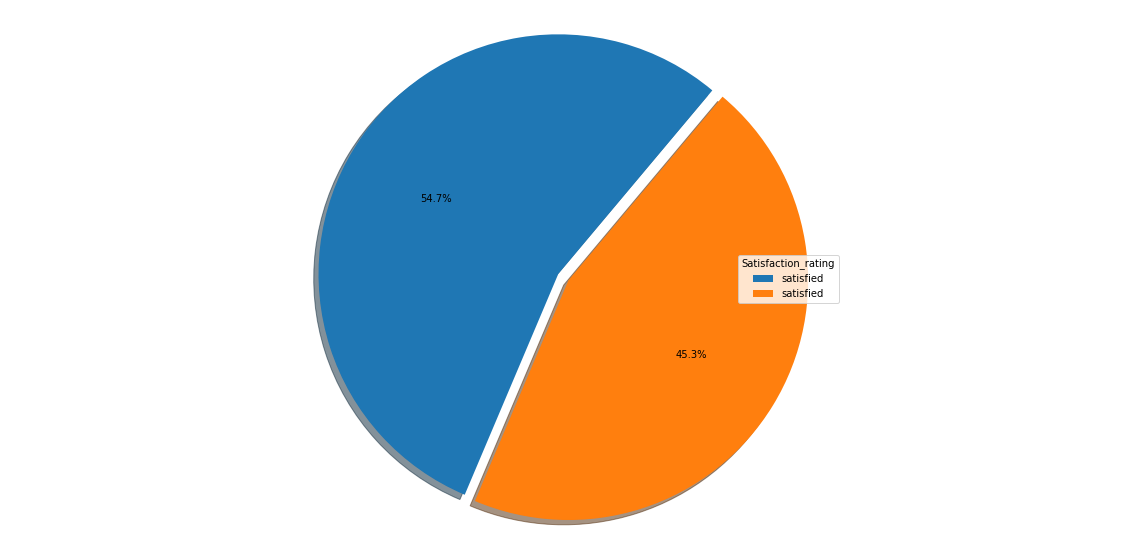

In [ ]:
# Visualize the percentage of each satisfaction category
fig, ax = plt.subplots(figsize=(20, 10), sharey=True)
pie = ax.pie(air['satisfaction'].value_counts(),explode = (0, 0.05), autopct='%1.1f%%',
        shadow=True, startangle=50)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.legend(air.satisfaction,
          title="Satisfaction_rating",
          loc="center",
          bbox_to_anchor=(0.45, 0.5, 0.5, 0))
plt.show()

Text(0, 0.5, 'Count')

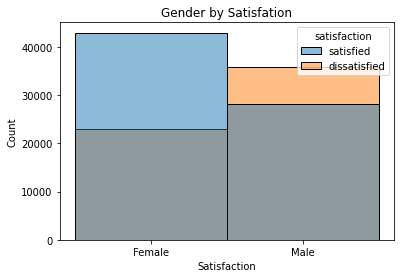

In [ ]:
# check Gender grouped by'satisfaction'
sns.histplot(air, x = 'Gender', hue = 'satisfaction')
plt.title('Gender by Satisfation');
plt.xlabel('Satisfaction')
plt.ylabel('Count')

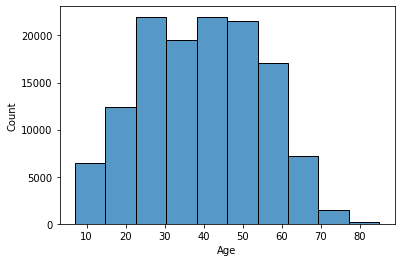

In [ ]:
# Check the age distribution
sns.histplot(air['Age'], bins=10) 

In [ ]:
# Check the age range value count 
air.Age_range.value_counts()

40-49    29636
18-29    26179
30-39    25704
50-59    23966
0-19     12180
60-69    10485
70-79      964
80+        766
Name: Age_range, dtype: int64

In [ ]:
# Group age range by satisfaction
pd.DataFrame(air['satisfaction'].groupby(air['Age_range']).value_counts())

satisfaction
Age_range satisfaction              
0-19      dissatisfied          6908
          satisfied             5272
18-29     dissatisfied         14531
          satisfied            11648
30-39     satisfied            12871
          dissatisfied         12833
40-49     satisfied            19481
          dissatisfied         10155
50-59     satisfied            15979
          dissatisfied          7987
60-69     dissatisfied          5282
          satisfied             5203
70-79     dissatisfied           678
          satisfied              286
80+       dissatisfied           419
          satisfied              347

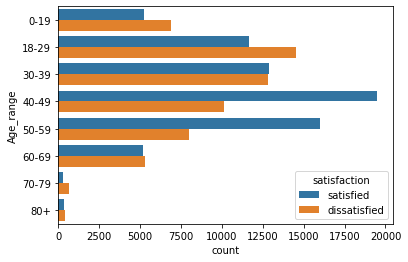

In [ ]:
sns.countplot(data=air.sort_values('Age_range'), y='Age_range', hue="satisfaction")

In [ ]:
# Get the mean of the all the customer satisfaction rating 
air.groupby(by='satisfaction')['Seat comfort','Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                               'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service',
                               'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'].mean()

<ipython-input-380-314613567b4c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  air.groupby(by='satisfaction')['Seat comfort','Departure/Arrival time convenient', 'Food and drink', 'Gate location',


,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
satisfaction,,,,,,,,,,,,,,
dissatisfied,2.467335,3.016686,2.660419,3.007756,2.919854,2.608644,2.959213,2.852261,2.973126,3.052625,3.364601,2.971850,3.377324,2.869695
satisfied,3.145653,2.969108,3.010438,2.976086,3.521460,4.024308,3.983260,3.984751,3.871946,3.844247,3.969488,3.645955,3.977394,3.751966


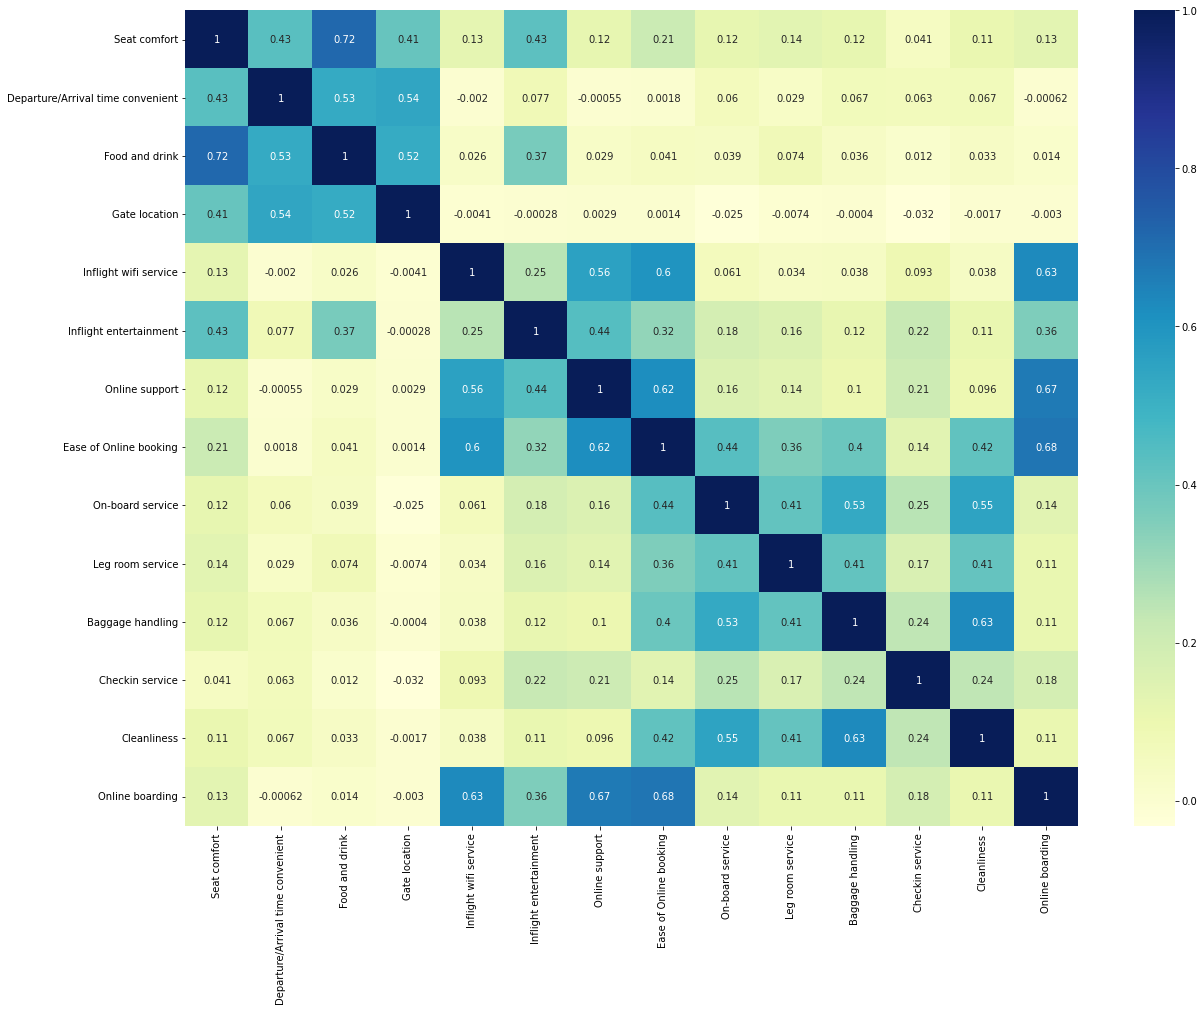

In [ ]:
 # Visualise the correlation between the customer satisfaction rating 
plt.subplots(figsize=(20,15))
sns.heatmap(air[['Seat comfort','Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

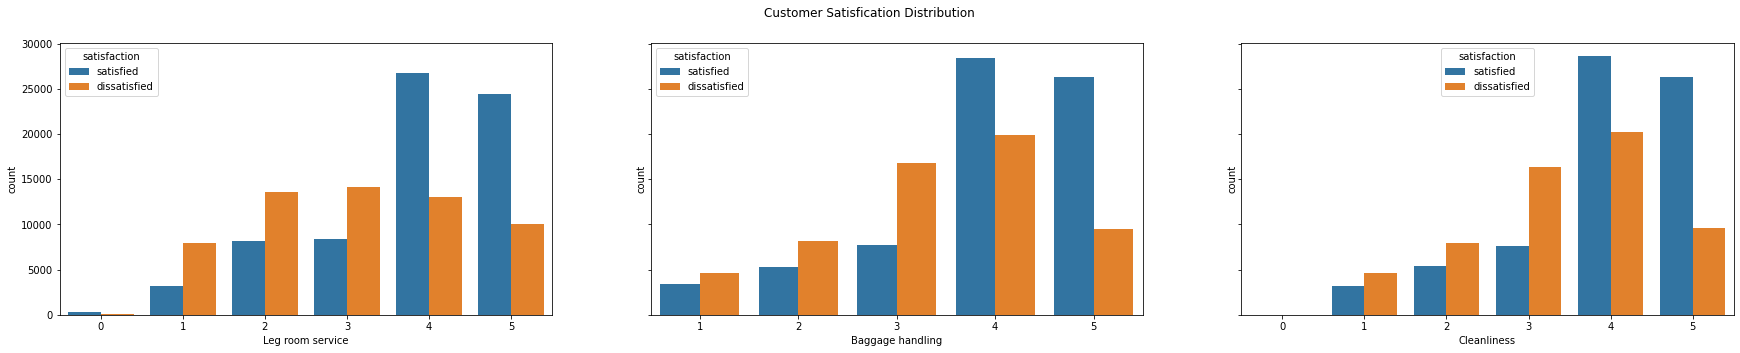

In [ ]:
# Note: ('Leg room service' 'Baggage handling', 'Cleanliness' # the dissatisfied average are high)
fig, axes = plt.subplots(1, 3, figsize=(30, 5), sharey=True)
fig.suptitle('Customer Satisfication Distribution')

# Visualise age range by seat comfort
sns.countplot(ax=axes[0], data=air, x='Leg room service', hue="satisfaction")

# Visualise age range by food and drink
sns.countplot(ax=axes[1], data=air, x='Baggage handling', hue="satisfaction")

# Visualise age range by inflight entertainmnent
sns.countplot(ax=axes[2], data=air, x='Cleanliness', hue="satisfaction")

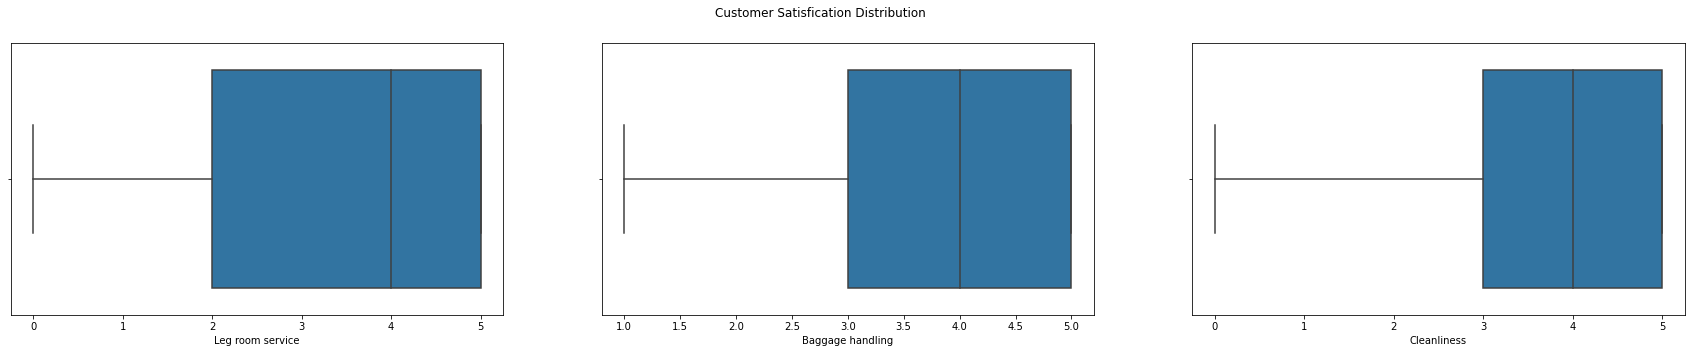

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(30, 5), sharey=True)
fig.suptitle('Customer Satisfication Distribution')

# Visualise age range by seat comfort
sns.boxplot(ax=axes[0], data=air, x='Leg room service', hue="satisfaction")

# Visualise age range by food and drink
sns.boxplot(ax=axes[1], data=air, x='Baggage handling', hue="satisfaction")

# Visualise age range by inflight entertainmnent
sns.boxplot(ax=axes[2], data=air, x='Cleanliness', hue="satisfaction")

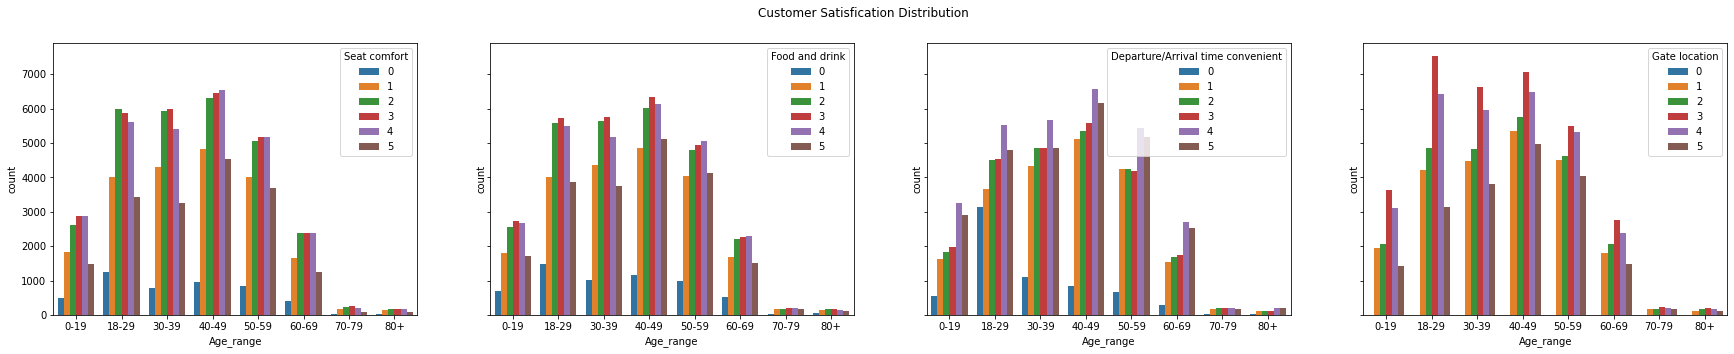

In [ ]:
# Note: (seat comfort, food and drink etc, satisfied average are low)
fig, axes = plt.subplots(1, 4, figsize=(30, 5), sharey=True)
fig.suptitle('Customer Satisfication Distribution')

# Visualise age range by seat comfort
sns.countplot(ax=axes[0], data=air.sort_values('Age_range'), x='Age_range', hue="Seat comfort")

# Visualise age range by food and drink
sns.countplot(ax=axes[1], data=air.sort_values('Age_range'), x='Age_range', hue="Food and drink")

# Visualise age range by inflight entertainmnent
sns.countplot(ax=axes[2], data=air.sort_values('Age_range'), x='Age_range', hue='Departure/Arrival time convenient')

# Visualise age range by 'Gate location
sns.countplot(ax=axes[3], data=air.sort_values('Age_range'), x='Age_range', hue='Gate location')

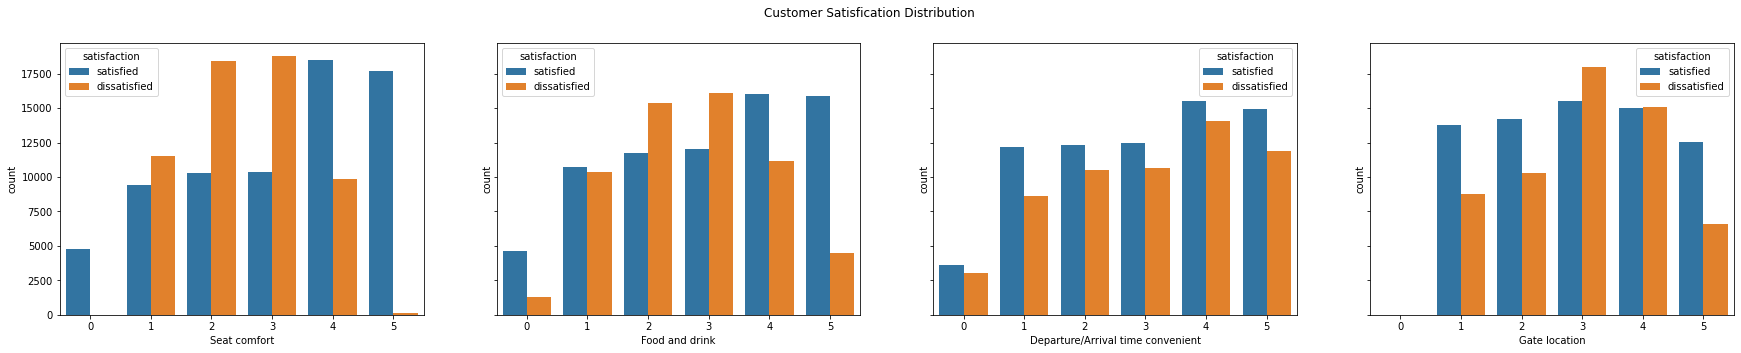

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(30, 5), sharey=True)
fig.suptitle('Customer Satisfication Distribution')

# Visualise age range by seat comfort
sns.countplot(ax=axes[0], data=air, x='Seat comfort', hue='satisfaction')

# Visualise age range by food and drink
sns.countplot(ax=axes[1], data=air, x='Food and drink', hue='satisfaction')

# Visualise age range by inflight entertainmnent
sns.countplot(ax=axes[2], data=air, x='Departure/Arrival time convenient', hue='satisfaction')

# Visualise age range by 'Gate location
sns.countplot(ax=axes[3], data=air, x='Gate location', hue='satisfaction')

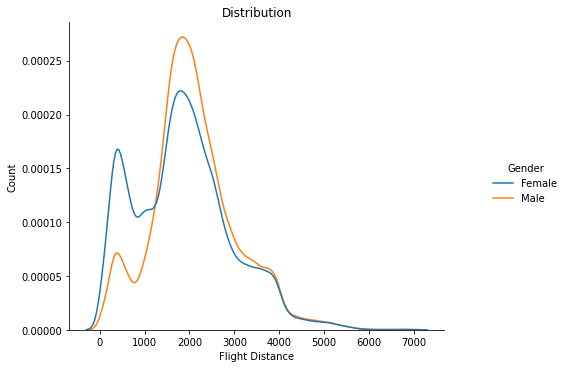

In [ ]:
# check the flight distance by Genderg 
  #sns.displot(data=air, x='Flight Distance', kde = True)
g=sns.displot(data=air, x='Flight Distance', hue  = 'Gender', kind="kde")
g.fig.set_figwidth(8.27)
plt.title("Distribution")
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.show()

In [ ]:
# To save Chart
#filename = 'mpl-bidirectional'
#plt.savefig(filename+'.png', facecolor=facecolor)

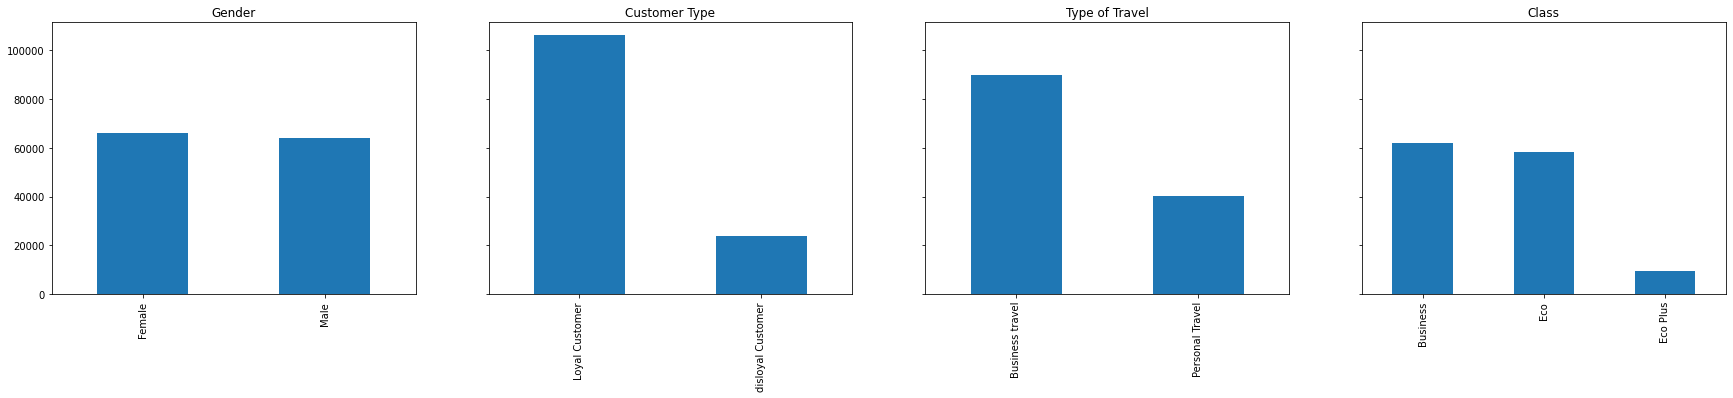

In [ ]:
# Visualize the distribution of the categprical ('Customer Type', 'Type of Travel','Class') columns
categorical_features = ['Gender', 'Customer Type', 'Type of Travel','Class']
fig, ax = plt.subplots(1,4, figsize=(30, 5), sharey=True)
for i, categorical_feature in enumerate(air[categorical_features]):
    air[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

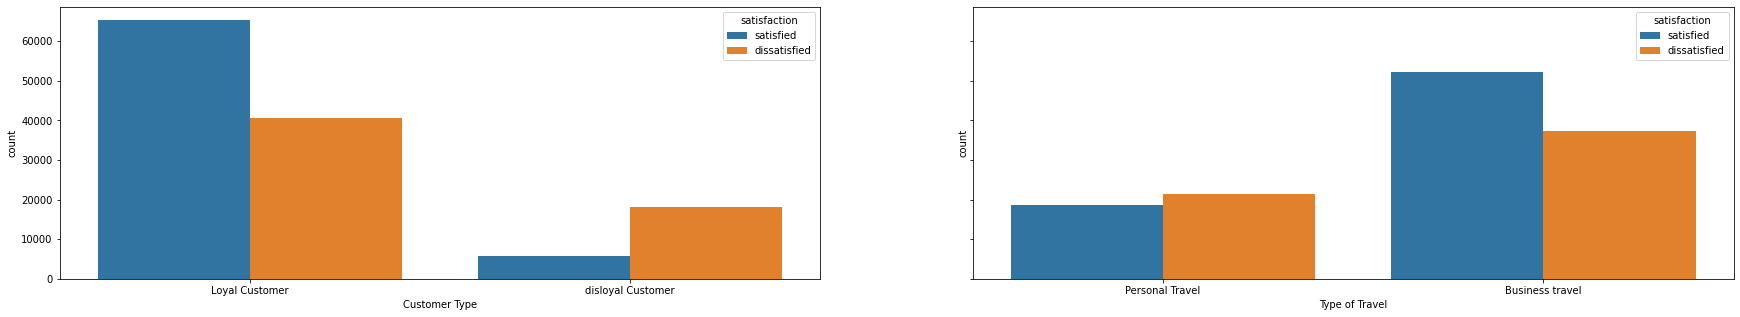

In [ ]:
# Visualise the customer type and type of travel by satisfaction
fig, axes = plt.subplots(1, 2, figsize=(30, 5), sharey=True)
sns.countplot( ax=axes[0], data=air, x='Customer Type', hue='satisfaction')
sns.countplot( ax=axes[1], data=air, x='Type of Travel', hue='satisfaction')

In [ ]:
# Check arrival delay minutes groupby class and satisfaction 
arrival_delay = air.groupby(['Class', 'satisfaction'])['Arrival Delay in Minutes'].sum().unstack().fillna(0)
arrival_delay

satisfaction,dissatisfied,satisfied
Class,,
Business,332107.738700,568804.753203
Eco,651101.662074,259319.834663
Eco Plus,104089.731448,44612.093546


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

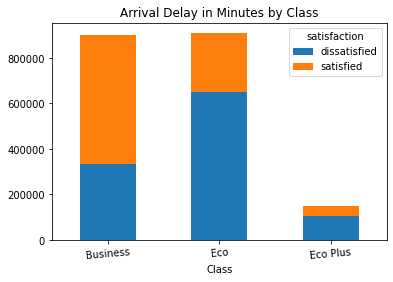

In [ ]:
# Visualise the arrival_delay groupby class and satisfaction
arrival_delay.plot(kind='bar', stacked=True)

# Add title and rotate the x-axis labels to be horizontal.
plt.title('Arrival Delay in Minutes by Class')
plt.xticks(rotation=5, ha='center')

In [ ]:
# Check arrival delay minutes groupby class and satisfaction 
d_delay = air.groupby(['Class', 'satisfaction'])['Departure Delay in Minutes'].sum().unstack().fillna(0)
d_delay

satisfaction,dissatisfied,satisfied
Class,,
Business,319682,569491
Eco,627577,251946
Eco Plus,99712,42609


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

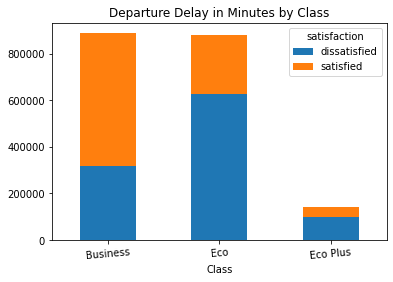

In [ ]:
# Visualise the arrival_delay groupby class and satisfaction
d_delay.plot(kind='bar', stacked=True)

# Add title and rotate the x-axis labels to be horizontal.
plt.title('Departure Delay in Minutes by Class')
plt.xticks(rotation=5, ha='center')

In [ ]:
#check the correlation
air.corr(method="pearson")

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011229
Flight Distance,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.109912
Seat comfort,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025465
Departure/Arrival time convenient,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002595
Food and drink,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014857
Gate location,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003634
Inflight wifi service,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035215
Inflight entertainment,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033268
Online support,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.036028
Ease of Online booking,0.071594,-0.022299,0.211531,0.001755,0.041189,0.001442,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039746


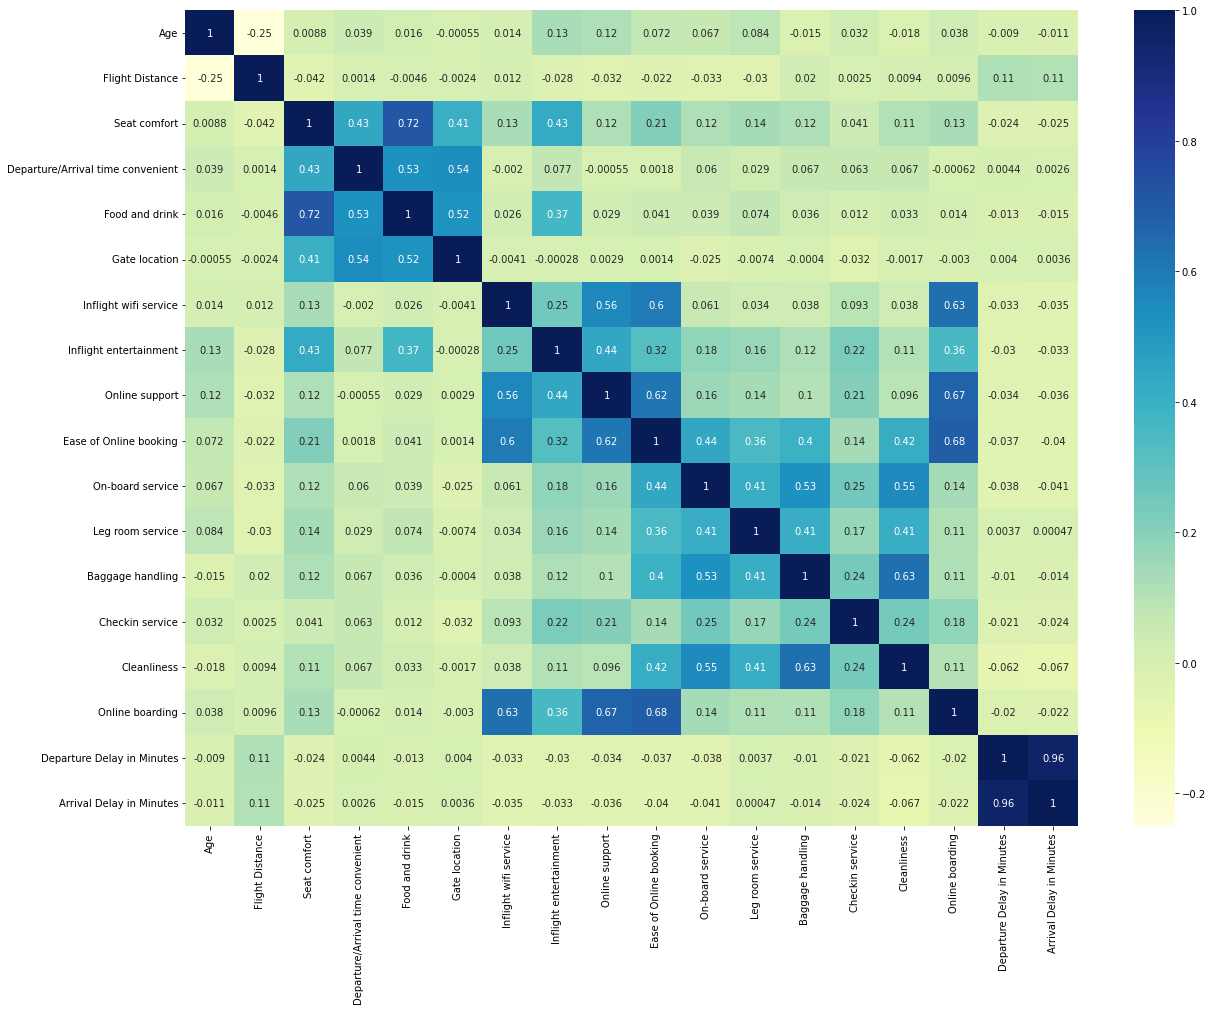

In [ ]:
 # plotting correlation heatmap
plt.subplots(figsize=(20,15))
corr = sns.heatmap(air.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
# Get dummies 
dum = pd.get_dummies(air.drop(['satisfaction','Age', 'Flight Distance', 'Seat comfort','Departure/Arrival time convenient', 'Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes','Age_range'],  axis=1), prefix=[ 'Gender', 'Customer Type', 'Type of Travel','Class'], drop_first=True)
dum


,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,0,1,1,0
...,...,...,...,...,...
129875,0,1,1,1,0
129876,1,1,1,0,0
129877,1,1,1,1,0
129878,1,1,1,1,0


In [ ]:
# Concatenate the airline data with the dummies
air.drop([ 'Gender', 'Customer Type', 'Type of Travel','Class','Age_range'],axis = 1, inplace=True)
air = pd.concat([air, dum], axis = 1)
air

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,...,5,3,2,0,0.0,0,0,1,1,0
1,satisfied,47,2464,0,0,0,3,0,2,2,...,2,3,2,310,305.0,1,0,1,0,0
2,satisfied,15,2138,0,0,0,3,2,0,2,...,4,4,2,0,0.0,0,0,1,1,0
3,satisfied,60,623,0,0,0,3,3,4,3,...,4,1,3,0,0.0,0,0,1,1,0
4,satisfied,70,354,0,0,0,3,4,3,4,...,4,2,5,0,0.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,29,1731,5,5,5,3,2,5,2,...,4,4,2,0,0.0,0,1,1,1,0
129876,dissatisfied,63,2087,2,3,2,4,2,1,1,...,1,2,1,174,172.0,1,1,1,0,0
129877,dissatisfied,69,2320,3,0,3,3,3,2,2,...,2,3,2,155,163.0,1,1,1,1,0
129878,dissatisfied,66,2450,3,2,3,2,3,2,2,...,2,1,2,193,205.0,1,1,1,1,0


### Split data into X & y


In [ ]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# split the data into features (X) and target (y)
X = air.drop(["satisfaction"], axis=1)
y = air["satisfaction"]

In [ ]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((103904, 23), (25976, 23), (103904,), (25976,))

In [ ]:
y_train

123182       satisfied
104063       satisfied
112892       satisfied
37572     dissatisfied
62475        satisfied
              ...     
98264        satisfied
113790       satisfied
90137        satisfied
31729     dissatisfied
53090     dissatisfied
Name: satisfaction, Length: 103904, dtype: object

In [ ]:
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Modeling using Logistic regression

In [ ]:
# build the model
model = LogisticRegression(C=0.05, max_iter=150, multi_class='ovr', random_state=101,
                   solver='liblinear', verbose=2)
model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=0.05, max_iter=150, multi_class='ovr', random_state=101,
                   solver='liblinear', verbose=2)

In [ ]:
# make predictions for y_test
ytest_pred = model.predict(X_test)

In [ ]:
# make predictions for y_train
ytrain_pred = model.predict(X_train)

#### Evaluation with logistic regression

In [ ]:
# check the accuracy score
accuracy = accuracy_score(y_test, ytest_pred)
accuracy

0.8365029257776408

In [ ]:
# Get the classification report for logistic regression (y_test)
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

dissatisfied       0.82      0.82      0.82     11654
   satisfied       0.85      0.85      0.85     14322

    accuracy                           0.84     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.84      0.84      0.84     25976



In [ ]:
# Get the classification report for logistic regression (y_train)
print(classification_report(y_train, ytrain_pred))

              precision    recall  f1-score   support

dissatisfied       0.82      0.82      0.82     47139
   satisfied       0.85      0.85      0.85     56765

    accuracy                           0.84    103904
   macro avg       0.83      0.83      0.83    103904
weighted avg       0.84      0.84      0.84    103904



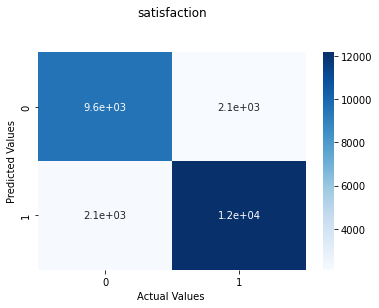

In [ ]:
# confusion matrix for test metric
conf_matrix = confusion_matrix(y_test, ytest_pred)
ax = sns.heatmap(confusion_matrix(y_test, ytest_pred),annot=True, cmap='Blues')
ax.set_title('satisfaction\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');


In [ ]:
conf_matrix

array([[ 9555,  2099],
       [ 2148, 12174]])

#### Modeling using randomforest

In [ ]:
# build the model with randomforest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# make predictions for y_test
ytest_pred = model.predict(X_test)

In [ ]:
# make predictions for y_train
ytrain_pred = model.predict(X_train)

#### Evaluation with randomforest

In [ ]:
# check the accuracy score
accuracy = accuracy_score(y_test, ytest_pred)
accuracy

0.9583076686171851

In [ ]:
# Get the classification report for logistic regression (y_test)
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

dissatisfied       0.94      0.96      0.95     11654
   satisfied       0.97      0.95      0.96     14322

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
# Get the classification report for logistic regression (y_train)
print(classification_report(y_train, ytrain_pred))

              precision    recall  f1-score   support

dissatisfied       1.00      1.00      1.00     47139
   satisfied       1.00      1.00      1.00     56765

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



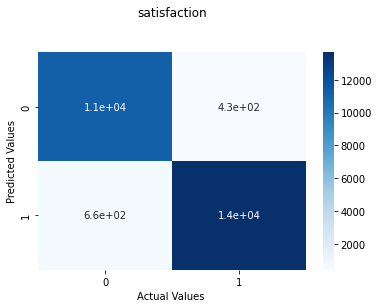

In [ ]:
# confusion matrix for test metric
conf_matrix = confusion_matrix(y_test, ytest_pred)
ax = sns.heatmap(confusion_matrix(y_test, ytest_pred),annot=True, cmap='Blues')
ax.set_title('satisfaction\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');

In [ ]:
conf_matrix

array([[11226,   428],
       [  655, 13667]])